In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from fomos.io import FormindData
from fomos.data import MLData

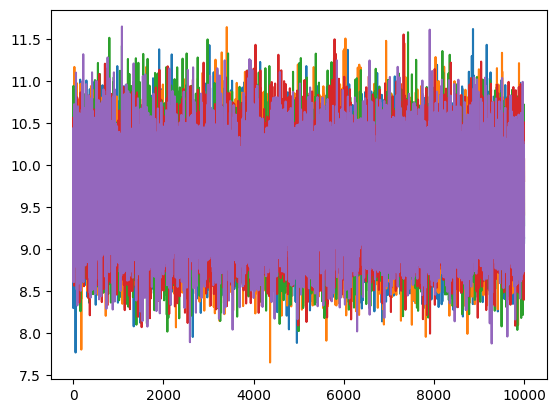

In [11]:
directory = "/data/compoundx/anand/forest-mortality/formind_sim/1ha_sim/beech/" 

fig, ax = plt.subplots(1,1)
for i in range(5):
    filename = directory + f"beech_dynMort_{i}_10000ha.h5"
    with h5py.File(filename, "r") as f:
        Y = f["MBR"][:]
        Xd = f["temp"][:]
        Xs = f["d_dist"][:]

    ax.plot(Xd.mean(1))

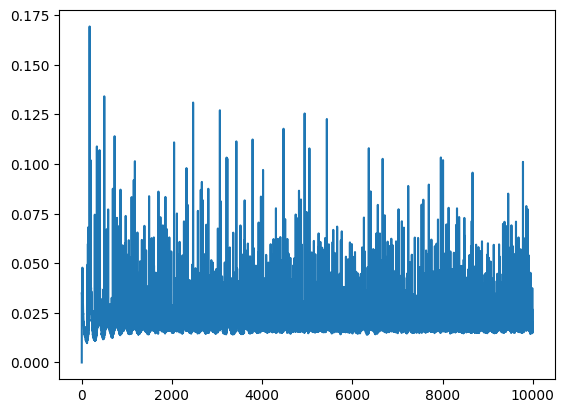

In [7]:
plt.plot(Y)
plt.show()

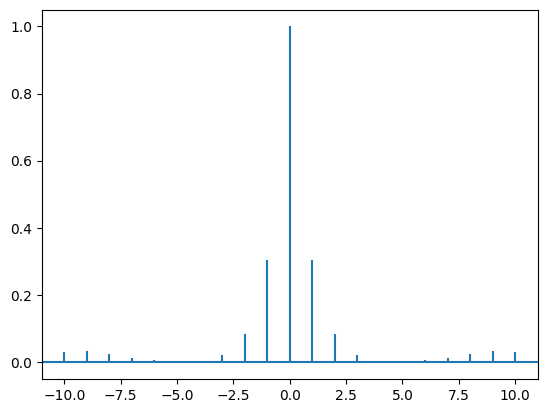

In [8]:
plt.acorr((Y-np.mean(Y))/np.std(Y))
plt.show()


In [73]:
Xs.shape

(10000, 101)

# Visualize Forest Structure

In [11]:
with h5py.File("/data/compoundx/anand/benchmark-dataset/" + "test_MBR_beech_pentad_10000ha.h5") as f:
    Xd = f["Xd"][:]
    Xs = f["Xs"][:]
    Y = f["Y"][:]

In [12]:
print(Xd.shape)

(11995, 219, 3, 1)


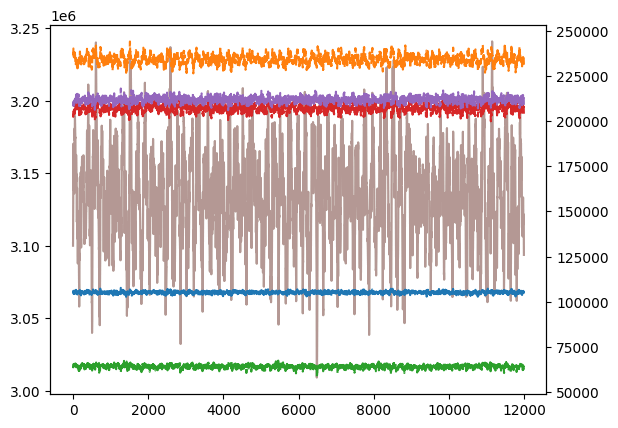

In [13]:
fig, ax_l = plt.subplots(1,1)
ax_r = plt.twinx() 
for i in range(Xs.shape[-1]):
    ax_l.plot(Xs[:,:, i].sum(1), alpha = 0.2)
    ax_r.plot(Xs[:,:, i].std(1), linestyle = "--")


# Visualize with extremes

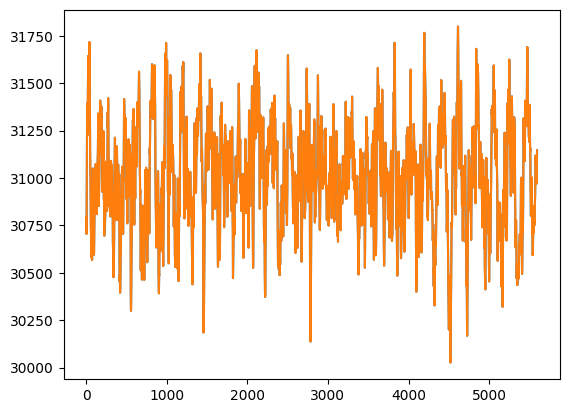

In [29]:
plt.plot(Xs.mean(1)[:,1])
plt.plot(Xs.mean(1)[:,2])

In [7]:
def norm(X):
    return (X-X.mean(0))/X.std(0)

Xd_norm = norm(Xd)
Xs_norm = norm(Xs)


/tmp/ipykernel_155405/2798330015.py:2: RuntimeWarning: invalid value encountered in divide
  return (X-X.mean(0))/X.std(0)


### Weather

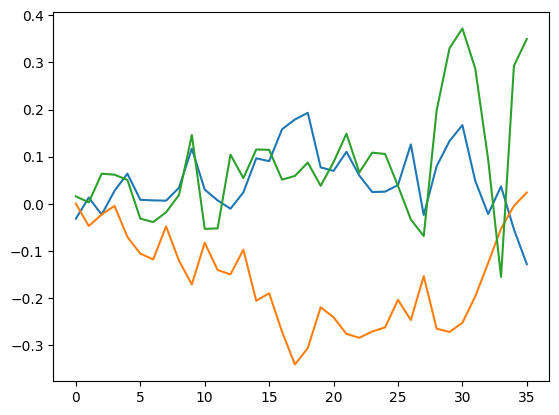

In [8]:
index = Y > np.percentile(Y, 90)
for i in range(3):
    plt.plot(Xd_norm[index, :, i, 0].mean(0))

plt.show()

### Forest Structure

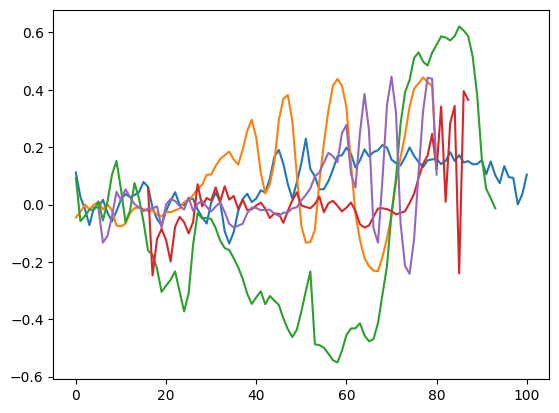

In [33]:
for i in range(5):
    plt.plot(Xs_norm[index, :, i].mean(0))